<a href="https://colab.research.google.com/github/jmachima/VisionTransformer_vs_CNN_on_Bees_n_Wasps/blob/main/ViT_vs_CNN_bee_or_wasp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jasmine Machima 

jasmine.machima@gmail.com

Comparison of image classification models: Vision Transformer vs. Convolutional Neural Network

Data set: Bee or Wasp (https://www.kaggle.com/jerzydziewierz/bee-vs-wasp) from Kaggles

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
from PIL import Image
import pathlib

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [2]:
tf.__version__  # using Colab

'2.7.0'

In [3]:
# Set up a TPU environment (faster than using GPU)

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.40.89.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.40.89.98:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [4]:
!mkdir stingers



In [5]:
os.getcwd() 
os.chdir('stingers') 


In [ ]:
from google.colab import files
files.upload() # upload BEE.zip and WASP.zip

In [ ]:
!unzip BEE.zip
!unzip WASP.zip
!rm BEE.zip
!rm WASP.zip

In [8]:
os.chdir('/content/') 

# Return to the main directory for Colab user

In [9]:
# Function to extract images

def extractpix(directory):
  image_set = []
  label_set = []
  # get the image paths inside the directory
  
  count = 0
  for dirc in sorted(os.listdir(directory)):
    print(dirc)
    for img_path in os.listdir(directory+'/'+str(dirc)):
      im = Image.open(directory+'/'+str(dirc)+'/'+str(img_path))
      image_set.append(np.array(im))
      label_set.append(count)
      # when finished with the first directory, the label for the second directory changes
    count += 1
  image_set = np.array(image_set)
  label_set = np.array(label_set)
  return image_set, label_set

In [10]:
image_set, label_set = extractpix('stingers')


BEE
WASP


In [ ]:
from google.colab import files
files.upload()   #get flowers.zip


In [ ]:
!unzip flower.zip
external_set, ex_label = extractpix('flower') # bring in images of wasps on flowers NOT USED IN TRAIN/VAL/TEST data sets

In [15]:
num_classes = 2
input_shape = (160, 160, 3)

X_train, X_dev_test, y_train, y_dev_test = train_test_split(image_set, label_set, test_size=0.3, random_state=39)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5, random_state=97)
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_dev shape: {X_dev.shape} - y_dev shape: {y_dev.shape}")

x_train shape: (3312, 160, 160, 3) - y_train shape: (3312,)
x_dev shape: (710, 160, 160, 3) - y_dev shape: (710,)


## Vision Transformer Model for training 
Adapted from https://keras.io/examples/vision/image_classification_with_vision_transformer/

In [20]:
# Accelerate the training process with TPUs (Tensor Processing Units) 

with strategy.scope():
    learning_rate = 0.000085
    batch_size = 64
    num_epochs = 15
    image_size = 160  
    patch_size = 10  # Size of the patches to be extract from the input images
    num_patches = (image_size // patch_size) ** 2
    projection_dim = 256
    num_heads = 12   # of separate transformer heads
    transformer_units = [
        projection_dim * 2,
        projection_dim]  # output dimension of multilayer perceptrons in a transformer unit
    
    # Number of successive transformer layers
    transformer_layers = 16
    mlp_head_units = [2048, 1024]  # output dimensions of dense layers before the final layer
    
    # Setting up an input processing layer
    data_adaptation = layers.Normalization()

    data_adaptation.adapt(X_train)
    # Adapt the above normalization layer to the mean and the variance of the training data for future normalization.
    # X_train itself has not been changed here

    # Defining Multi-layer perceptrons (mlp) layers
    def mlp(x, hidden_units, dropout_rate):
      for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
      return x

    class Patches(layers.Layer):
      def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

      def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    
    class PatchEncoder(layers.Layer):
      def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

      def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)  # each patch needs info on its position within the image
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded
    

    def TransformerBlock(X):
      x1 = layers.LayerNormalization(epsilon=1e-7)(X)
          # Create a multi-head attention layer.
      attention_output = layers.MultiHeadAttention(
          num_heads=num_heads, key_dim=projection_dim, dropout=0.1
      )(x1, x1)
          # Skip connection 1.
      x2 = layers.Add()([attention_output, X])
          # Layer normalization 2.
      x3 = layers.LayerNormalization(epsilon=1e-7)(x2)
          # MLP.
      x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
          # Skip connection 2.
      encoded_patches = layers.Add()([x3, x2])
      return encoded_patches

    # Setting up an input processing layer
    #data_adaptation = layers.Normalization()

    #data_adaptation.adapt(X_train)
    # Adapt the above layer to the mean and the variance of the training data for future normalization.
    # X_train itself has not been changed here

    def vit_model():
      inputs = layers.Input(shape=input_shape)
      # Augment data.
      adapted = data_adaptation(inputs)
      #adapted = layers.Normalization(axis=None).adapt(inputs)
      # Create patches.
      patches = Patches(patch_size)(adapted)
      # Encode patches.
      encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

      # Create multiple layers of the Transformer block.

      for _ in range(transformer_layers):
        encoded_patches = TransformerBlock(encoded_patches)
      
      representation = layers.LayerNormalization(epsilon=1e-7)(encoded_patches)
      representation = layers.Flatten()(representation)
      representation = layers.Dropout(0.1)(representation)  
      # Add MLP.
      features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.1)
      # Classify outputs.
      logits = layers.Dense(num_classes)(features)
      # Create the Keras model.
      model = keras.Model(inputs=inputs, outputs=logits)
      return model

    vit_classifier = vit_model()

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate, epsilon = 1e-7)

    vit_classifier.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"))
              
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=13)  # when preferred

    history_vit =  vit_classifier.fit(
          x=X_train,
          y=y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_split=0.0, validation_data=(X_dev,y_dev)) #,
          #callbacks=callback)
          

Epoch 1/15
52/52 [==============================] - 174s 2s/step - loss: 0.9377 - accuracy: 0.7153 - val_loss: 0.4303 - val_accuracy: 0.8282
Epoch 2/15
52/52 [==============================] - 9s 182ms/step - loss: 0.3296 - accuracy: 0.8650 - val_loss: 0.5017 - val_accuracy: 0.8155
Epoch 3/15
52/52 [==============================] - 9s 182ms/step - loss: 0.1802 - accuracy: 0.9315 - val_loss: 0.3990 - val_accuracy: 0.8408
Epoch 4/15
52/52 [==============================] - 9s 182ms/step - loss: 0.0920 - accuracy: 0.9665 - val_loss: 0.4733 - val_accuracy: 0.8465
Epoch 5/15
52/52 [==============================] - 9s 183ms/step - loss: 0.0550 - accuracy: 0.9798 - val_loss: 0.4926 - val_accuracy: 0.8479
Epoch 6/15
52/52 [==============================] - 9s 182ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.5548 - val_accuracy: 0.8606
Epoch 7/15
52/52 [==============================] - 9s 182ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.6283 - val_accuracy: 0.8268
Epoch 8

In [21]:
# Evaluating the trained ViT model on the test data set

Pred = vit_classifier.predict(X_test)

Prediction = np.argmax(Pred, axis = 1) # predicted category

confusion = metrics.confusion_matrix(y_test, Prediction)
print("Confusion Matrix:\n",confusion,"\n")

accuracy = metrics.accuracy_score(y_test, Prediction)
print("Test Accuracy:", round(accuracy*100,1),'%')

print(metrics.classification_report(y_test, Prediction, digits=3))

Confusion Matrix:
 [[326  39]
 [ 62 283]] 

Test Accuracy: 85.8 %
              precision    recall  f1-score   support

           0      0.840     0.893     0.866       365
           1      0.879     0.820     0.849       345

    accuracy                          0.858       710
   macro avg      0.860     0.857     0.857       710
weighted avg      0.859     0.858     0.857       710



In [22]:
# Most bees are found on flowers. Let's check the model on wasps on flowers

Ex_Pred = vit_classifier.predict(external_set)

Ex_Prediction = np.argmax(Ex_Pred, axis = 1) 

Ex_confusion = metrics.confusion_matrix(ex_label, Ex_Prediction)
print("Confusion Matrix:\n",Ex_confusion,"\n")

Ex_accuracy = metrics.accuracy_score(ex_label, Ex_Prediction)
print("Test Accuracy:", round(Ex_accuracy*100,1),'%')


Confusion Matrix:
 [[ 0  0]
 [24  3]] 

Test Accuracy: 11.1 %


The trained ViT model cannot correctly predict the wasp class on a background commonly found with bees

# Training with Convolutional Neural Network (CNN) 



In [28]:
history_CNN = 0
Model = 0

In [23]:
# input shape for the CNN model
INPUT_SHAPE = (160, 160, 3)

# Convert list of rgb arrays into tensors

Xtr = tf.convert_to_tensor(X_train)
Xdv = tf.convert_to_tensor(X_dev)
Xtst = tf.convert_to_tensor(X_test)

# Using One Hot Encoder to transform 0 into [1,0] and 1 into [0,1]
OH = OneHotEncoder()

def OHT(y_train):
  y = np.reshape(y_train, (-1,1))
  y = OH.fit_transform(y).toarray()
  y = tf.convert_to_tensor(y, dtype=tf.int32)
  return y

# Transform the y arrays
Ytr, Ydv, Ytst = [OHT(y_train) for y_train in [y_train, y_dev, y_test]]



In [29]:
# With CNN, the training does not need TPUs. With only CPU or GPU, the training can progress at a reasonable speed.

#Each layer of convolution needs to be followed by Batch Normalization, Max Pooling, and Dropout, 
#which can be group together in an appropriate sequence.
def NormMaxDrop(dropout):
  LayerGrp = tf.keras.Sequential(
                [layers.BatchNormalization(axis=-1),
                 layers.MaxPooling2D(pool_size=(2, 2)),
                 layers.Dropout(dropout)]
  )
  return LayerGrp

NMD_1, NMD_2, NMD_3, NMD_4 = [NormMaxDrop(0.1) for _ in range(4)]

def CNN_MODEL():

    model = tf.keras.models.Sequential()
    input_shape = INPUT_SHAPE

    model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(NMD_1) 
    
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(NMD_2) 
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(NMD_3) 

    model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(NMD_4) 
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(320, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    return model

Model = CNN_MODEL()

EPOCHS = 12
opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
Model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history_CNN = Model.fit(Xtr, Ytr, epochs=EPOCHS, validation_data=(Xdv, Ydv))

Epoch 1/12
104/104 [==============================] - 14s 127ms/step - loss: 0.5864 - accuracy: 0.7826 - val_loss: 0.5379 - val_accuracy: 0.7183
Epoch 2/12
104/104 [==============================] - 13s 126ms/step - loss: 0.2945 - accuracy: 0.8759 - val_loss: 0.4040 - val_accuracy: 0.8155
Epoch 3/12
104/104 [==============================] - 13s 123ms/step - loss: 0.2572 - accuracy: 0.8907 - val_loss: 0.3179 - val_accuracy: 0.8563
Epoch 4/12
104/104 [==============================] - 13s 122ms/step - loss: 0.1992 - accuracy: 0.9236 - val_loss: 0.3048 - val_accuracy: 0.8775
Epoch 5/12
104/104 [==============================] - 13s 125ms/step - loss: 0.1760 - accuracy: 0.9293 - val_loss: 0.2303 - val_accuracy: 0.8986
Epoch 6/12
104/104 [==============================] - 13s 125ms/step - loss: 0.1623 - accuracy: 0.9354 - val_loss: 0.2896 - val_accuracy: 0.8873
Epoch 7/12
104/104 [==============================] - 13s 124ms/step - loss: 0.1238 - accuracy: 0.9559 - val_loss: 0.2208 - val_ac

In [30]:
#Testing the CNN Model on the test data set.

pred = Model.predict(Xtst)
#Pred = model.predict(X_test)

prediction = np.argmax(pred, axis = 1) # predicted category

Confusion = metrics.confusion_matrix(y_test, prediction)
print("Confusion Matrix:\n",Confusion,"\n")

Accuracy = metrics.accuracy_score(y_test, prediction)
print("Test Accuracy:", round(Accuracy*100,1),'%')

print(metrics.classification_report(y_test, prediction, digits=4))

Confusion Matrix:
 [[334  31]
 [ 25 320]] 

Test Accuracy: 92.1 %
              precision    recall  f1-score   support

           0     0.9304    0.9151    0.9227       365
           1     0.9117    0.9275    0.9195       345

    accuracy                         0.9211       710
   macro avg     0.9210    0.9213    0.9211       710
weighted avg     0.9213    0.9211    0.9211       710



Test Accuracy: 18.5 %

 Confusion Matrix:
 [[ 0  0]
 [22  5]] 



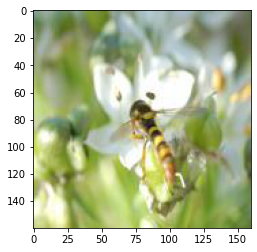

BEE: 96.7 %  WASP: 3.3 %


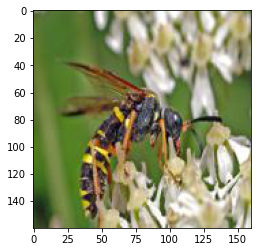

BEE: 99.1 %  WASP: 0.9 %


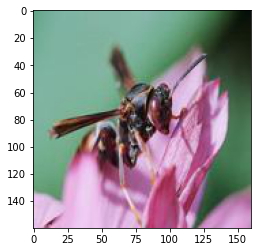

BEE: 99.7 %  WASP: 0.3 %


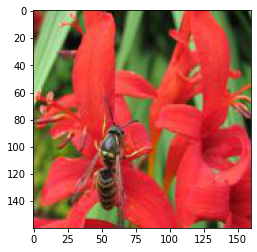

BEE: 36.4 %  WASP: 63.6 %


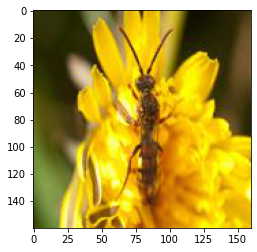

BEE: 90.9 %  WASP: 9.1 %


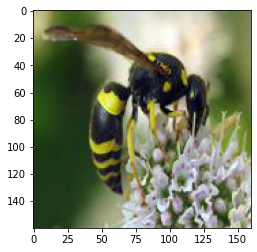

BEE: 91.3 %  WASP: 8.7 %


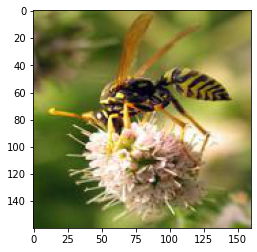

BEE: 49.7 %  WASP: 50.3 %


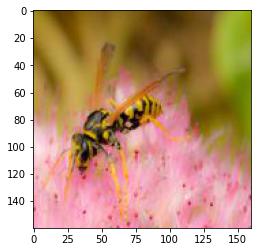

BEE: 98.9 %  WASP: 1.1 %


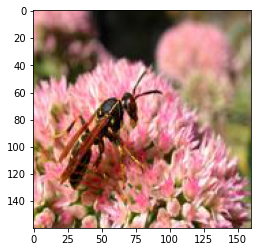

BEE: 99.8 %  WASP: 0.2 %


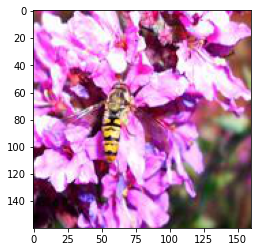

BEE: 100.0 %  WASP: 0.0 %


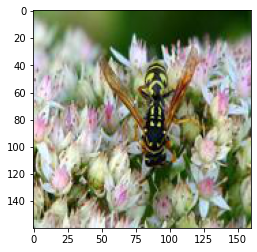

BEE: 48.5 %  WASP: 51.5 %


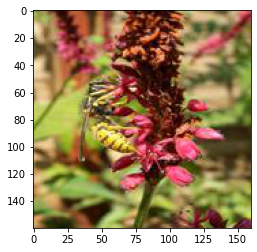

BEE: 99.3 %  WASP: 0.7 %


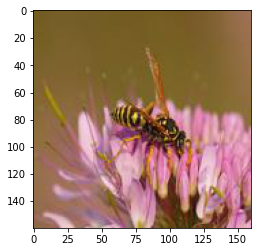

BEE: 100.0 %  WASP: 0.0 %


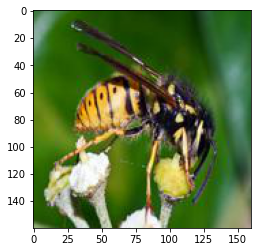

BEE: 77.9 %  WASP: 22.1 %


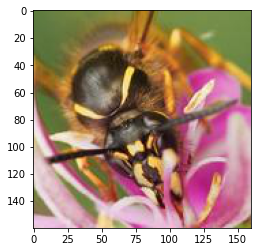

BEE: 96.0 %  WASP: 4.0 %


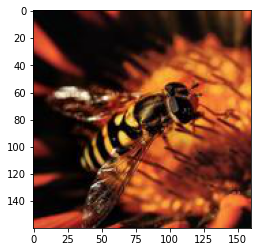

BEE: 92.6 %  WASP: 7.4 %


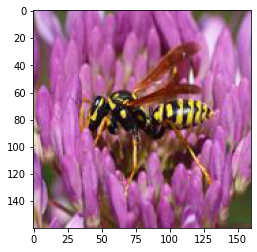

BEE: 99.2 %  WASP: 0.8 %


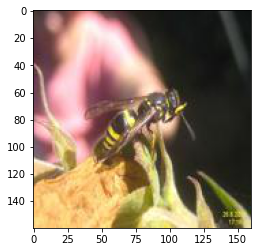

BEE: 60.5 %  WASP: 39.5 %


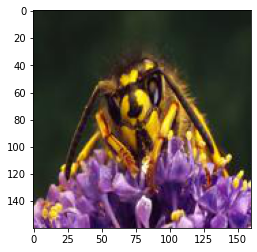

BEE: 94.8 %  WASP: 5.2 %


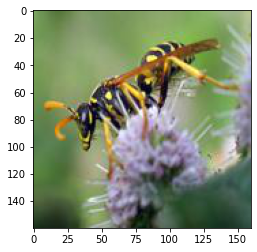

BEE: 20.9 %  WASP: 79.1 %


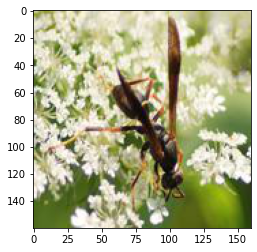

BEE: 79.2 %  WASP: 20.8 %


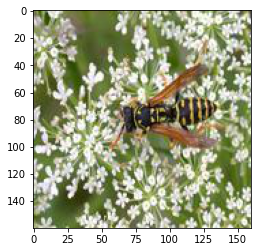

BEE: 22.1 %  WASP: 77.9 %


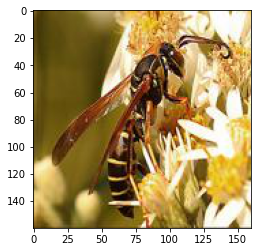

BEE: 97.0 %  WASP: 3.0 %


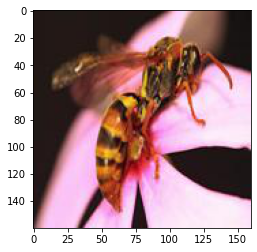

BEE: 100.0 %  WASP: 0.0 %


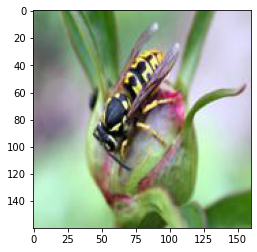

BEE: 96.7 %  WASP: 3.3 %


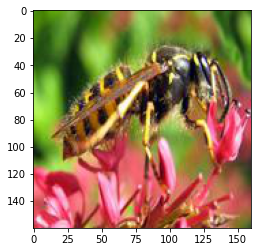

BEE: 57.2 %  WASP: 42.8 %


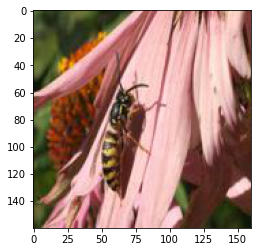

BEE: 99.8 %  WASP: 0.2 %


In [33]:
import matplotlib.pyplot as plt

ExTest = tf.convert_to_tensor(external_set)

Y_ex = [1]*len(ExTest)

ex_pred = Model.predict(ExTest)
ex_pred = ex_pred*100

ex_prediction = np.argmax(ex_pred, axis = 1) 

ex_accuracy = metrics.accuracy_score(ex_label, ex_prediction)
print("Test Accuracy:", round(ex_accuracy*100,1),'%')

confusion = metrics.confusion_matrix(Y_ex, prediction)
print('\n',"Confusion Matrix:\n",confusion,"\n")
for i in range(len(ExTest)):
    plt.imshow(external_set[i])
    plt.show()
    print("BEE:", round(pred[i][0],1),"% ","WASP:", round(pred[i][1],1),"%")

CNN model has the same wasp on flower issue as the ViT model.

Vision Transformer may be more accurate and more efficient than CNN with other image sets but, for two image classes which are very similar to each other, CNN gives a comparable result if not better. In this case, CNN is also much faster as it does not require TPUs.